# All imports

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Data Extractor

In [11]:
def count_extractor(file_path):
    counts = dict()
    with open(file_path, 'r') as f:
        all_lines = f.readlines()
        i = 0
        while i<len(all_lines):
            if "Statistics" in all_lines[i]:
                break
            i += 1
        i+=1
        for j in range(i, len(all_lines)):
            try:
                key, value = all_lines[j].split(':')
                if '.' in value:
                    value = float(value)
                else:
                    value = int(value)
                counts[key.strip()] = value
            except:
                pass
    return counts

# Extract Benchmark Data

In [40]:
benchmarks = ['gcc', 'lbm', 'mcf', 'namd', 'xalancbmk']
all_data = []
for benchmark in benchmarks:
    data = count_extractor('./data/'+benchmark+'.count')
    all_data.append(data)
keys = list(all_data[0].keys())
keys

['Register Root Count',
 'Register Root Percent',
 'Register Inconsequent Count',
 'Register Inconsequent Percent',
 'Memory Root Count',
 'Memory Root Percent',
 'Memory Inconsequent Count',
 'Memory Inconsequent Percent',
 'Branch Root Count',
 'Branch Root Percent',
 'Branch Inconsequent Count',
 'Branch Inconsequent Percent',
 'Inconsequent Count',
 'Inconsequent Percent',
 'Dynamic Instructions Count',
 'Static Instructions Count']

# Plot Specific Type Inconsequence

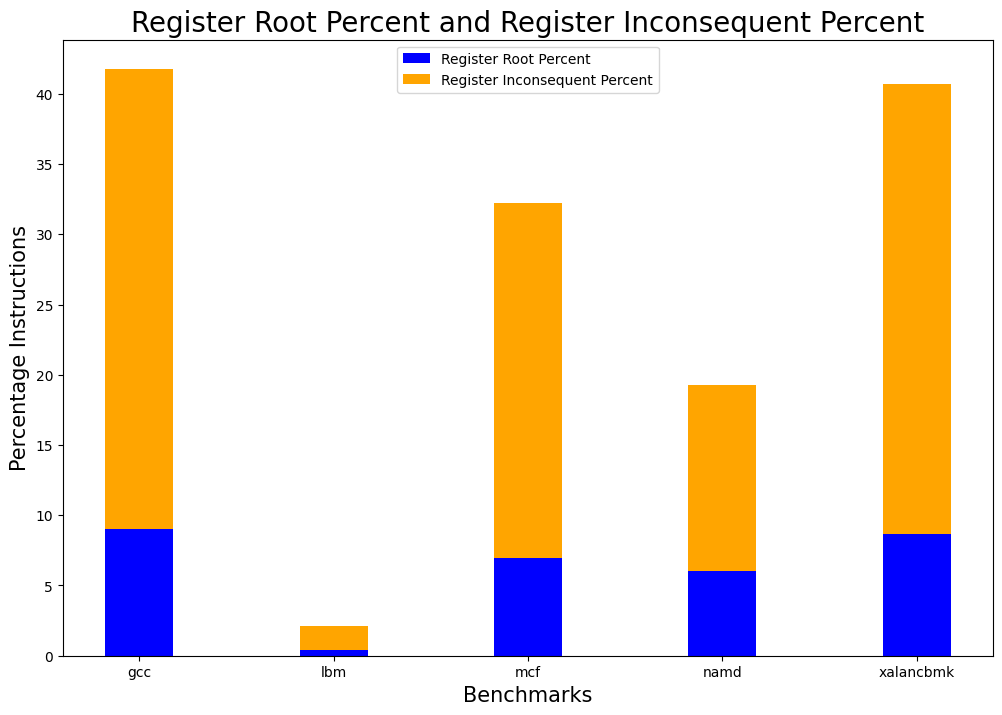

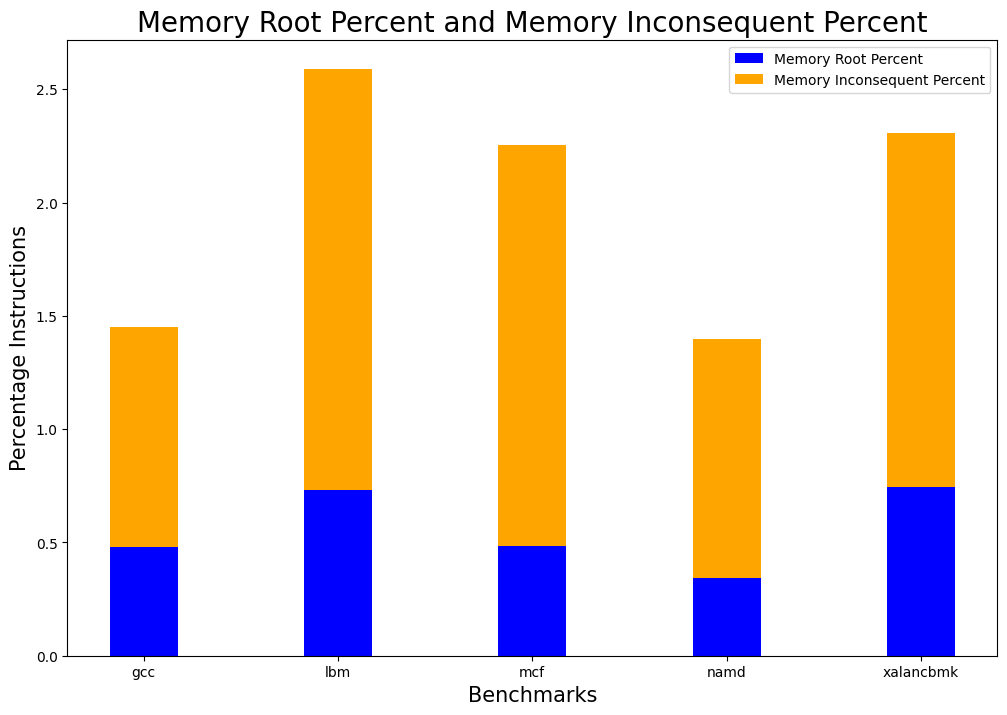

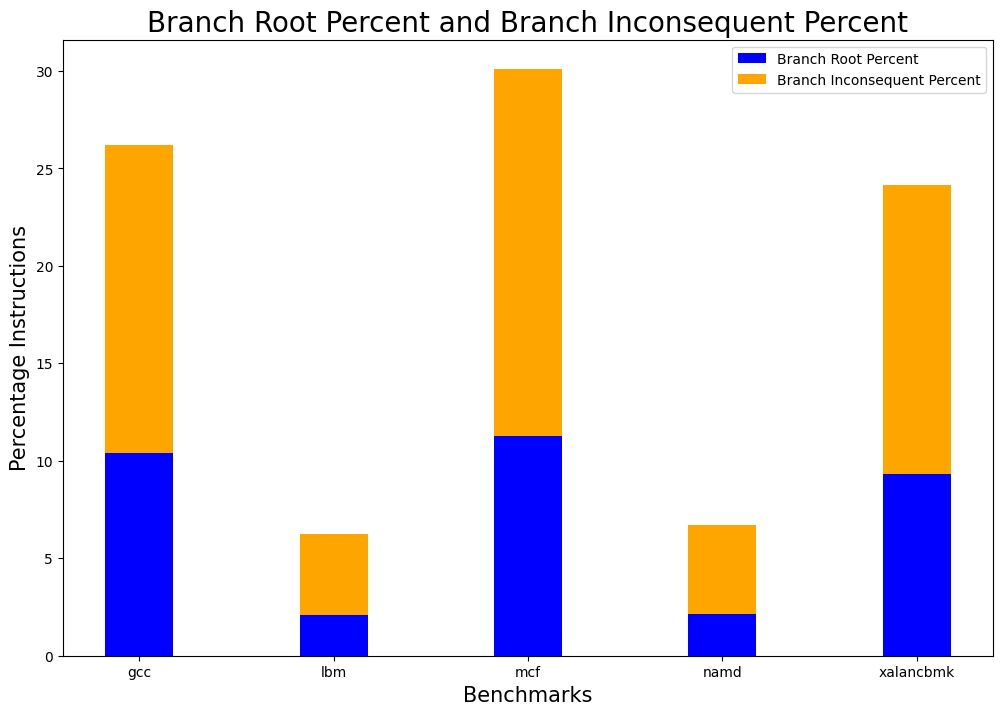

In [43]:
for i in range(1, 12, 4):
    plt.figure(figsize=(12, 8))
    bar_width = 0.35
    curr_keys = [keys[i], keys[i+2]]
    colors = ['blue', 'orange']
    data1 = [data[curr_keys[0]] for data in all_data]
    data2 = [data[curr_keys[1]] for data in all_data]
    plt.bar(benchmarks, data1, bar_width, color=colors[0], label=curr_keys[0])
    plt.bar(benchmarks, data2, bar_width, bottom=data1, color=colors[1], label=curr_keys[1])
    plt.title(curr_keys[0]+' and '+curr_keys[1], size=20)
    plt.xlabel('Benchmarks', size=15)
    plt.ylabel('Percentage Instructions', size=15)
    plt.legend()
    plt.savefig('plots/'+'_'.join(curr_keys[0].split())+'_'+'_'.join(curr_keys[1].split())+'.png')

# Print General Inconsequence

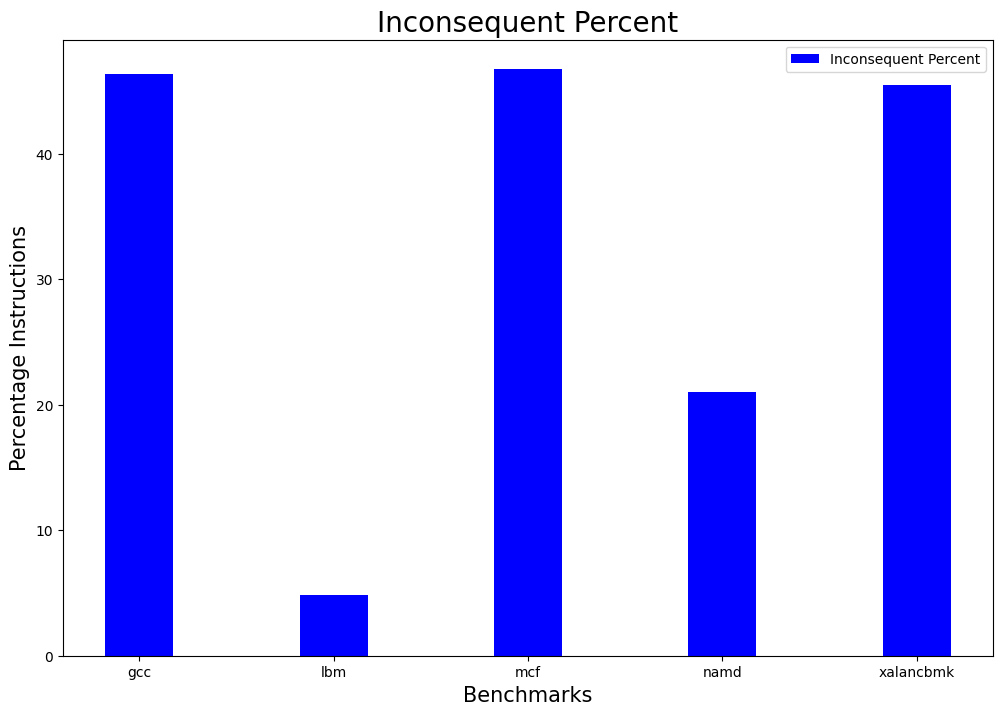

In [44]:
i = 13
plt.figure(figsize=(12, 8))
bar_width = 0.35
curr_keys = [keys[i]]
colors = ['blue']
data1 = [data[curr_keys[0]] for data in all_data]
plt.bar(benchmarks, data1, bar_width, color=colors[0], label=curr_keys[0])
plt.title(curr_keys[0], size=20)
plt.xlabel('Benchmarks', size=15)
plt.ylabel('Percentage Instructions', size=15)
plt.legend()
plt.savefig('plots/'+'_'.join(curr_keys[0].split())+'.png')